In [1]:

import pandas as pd

In [3]:
df = pd.read_csv('/Users/shashi/Desktop/ML/ ML_lab_me/student_dataset1.csv')

In [4]:
# Check for null values in the dataset
print(df.isnull().sum())


Student Name      0
Student ID        0
Year              0
IOT               0
CTSD              0
DS                3
OOPS              4
DTI               1
COA               1
DBMS              3
PFSD              1
MPC               0
ASE               0
OS                0
Specialization    0
dtype: int64


In [5]:

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill null values with the mean for numerical columns only
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Check the results
print("\nNull values after filling with mean:")
print(df.isnull().sum())  # Should show no null values for numeric columns


Null values after filling with mean:
Student Name      0
Student ID        0
Year              0
IOT               0
CTSD              0
DS                3
OOPS              4
DTI               1
COA               1
DBMS              3
PFSD              1
MPC               0
ASE               0
OS                0
Specialization    0
dtype: int64


In [6]:
# Convert specific columns to numeric and coerce errors to NaN
columns_to_convert = ['IOT', 'CTSD', 'DS', 'OOPS', 'DTI', 'COA', 'DBMS', 'PFSD', 'MPC', 'ASE', 'OS']
# Ensure that the DataFrame df is being used and not a non-existent df_cleaned
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Remove rows with any NaN values after conversion and define df_cleaned
df_cleaned = df.dropna()

# Check for null values in the cleaned dataset
print("\nNull values after cleaning:")
print(df_cleaned.isnull().sum())  # Should show no null values
print("\nCleaned dataset (first few rows):")
print(df_cleaned.head())           # Display the first few rows


Null values after cleaning:
Student Name      0
Student ID        0
Year              0
IOT               0
CTSD              0
DS                0
OOPS              0
DTI               0
COA               0
DBMS              0
PFSD              0
MPC               0
ASE               0
OS                0
Specialization    0
dtype: int64

Cleaned dataset (first few rows):
  Student Name  Student ID  Year  IOT  CTSD    DS  OOPS   DTI  COA  DBMS  \
0    Student_1        1000     1    8    10   6.0  10.0  10.0  6.0   6.0   
1    Student_2        1001     2    6    10  10.0   8.0  10.0  8.0  10.0   
2    Student_3        1002     1    9     9   6.0   9.0   8.0  9.0   6.0   
3    Student_4        1003     2   10    10  10.0   6.0   8.0  6.0  10.0   
4    Student_5        1004     1    7    10   6.0   7.0   9.0  7.0   7.0   

   PFSD  MPC  ASE  OS  Specialization  
0  10.0    8    6   6           Cloud  
1   8.0    9    7   8  Cyber Security  
2   7.0    6    7   9  Cyber Security  
3   8.

In [7]:
# Check the cleaned dataset
print(df_cleaned.isnull().sum())  # Should show no null values
print(df_cleaned.head())           # Display the first few rows


Student Name      0
Student ID        0
Year              0
IOT               0
CTSD              0
DS                0
OOPS              0
DTI               0
COA               0
DBMS              0
PFSD              0
MPC               0
ASE               0
OS                0
Specialization    0
dtype: int64
  Student Name  Student ID  Year  IOT  CTSD    DS  OOPS   DTI  COA  DBMS  \
0    Student_1        1000     1    8    10   6.0  10.0  10.0  6.0   6.0   
1    Student_2        1001     2    6    10  10.0   8.0  10.0  8.0  10.0   
2    Student_3        1002     1    9     9   6.0   9.0   8.0  9.0   6.0   
3    Student_4        1003     2   10    10  10.0   6.0   8.0  6.0  10.0   
4    Student_5        1004     1    7    10   6.0   7.0   9.0  7.0   7.0   

   PFSD  MPC  ASE  OS  Specialization  
0  10.0    8    6   6           Cloud  
1   8.0    9    7   8  Cyber Security  
2   7.0    6    7   9  Cyber Security  
3   8.0    8    8   6           Cloud  
4   7.0    6   10   7         

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Specialization'])  # Features (all columns except 'Specialization')
y = df['Specialization']  # Target (the 'Specialization' column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Train set size: 400
Test set size: 100


In [9]:
print("\nTraining Features (X_train):")
print(X_train)
print("\nTraining Target (y_train):")
print(y_train)
print("\nTesting Features (X_test):")
print(X_test)
print("\nTesting Target (y_test):")
print(y_test)


Training Features (X_train):
    Student Name  Student ID  Year  IOT  CTSD    DS  OOPS   DTI   COA  DBMS  \
249  Student_250        1249     2    8     8   7.0   6.0   6.0   8.0   6.0   
433  Student_434        1433     1    7     8   8.0  10.0  10.0   6.0   7.0   
19    Student_20        1019     2   10     8   9.0   9.0  10.0   6.0   8.0   
322  Student_323        1322     1    8     8   7.0  10.0  10.0   6.0   7.0   
332  Student_333        1332     1    7     6   8.0   7.0   9.0  10.0   8.0   
..           ...         ...   ...  ...   ...   ...   ...   ...   ...   ...   
106  Student_107        1106     2   10     6  10.0   9.0  10.0   NaN   8.0   
270  Student_271        1270     1    6     7   9.0   6.0   9.0   6.0  10.0   
348  Student_349        1348     1    6     6  10.0   8.0   8.0   8.0  10.0   
435  Student_436        1435     1    7     7   9.0   7.0   9.0   7.0   6.0   
102  Student_103        1102     1    8    10   8.0   6.0   7.0   8.0   9.0   

     PFSD  MPC  ASE  

In [10]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [11]:
print(f'Number of numeric columns: {len(X_train.columns)}')


Number of numeric columns: 14


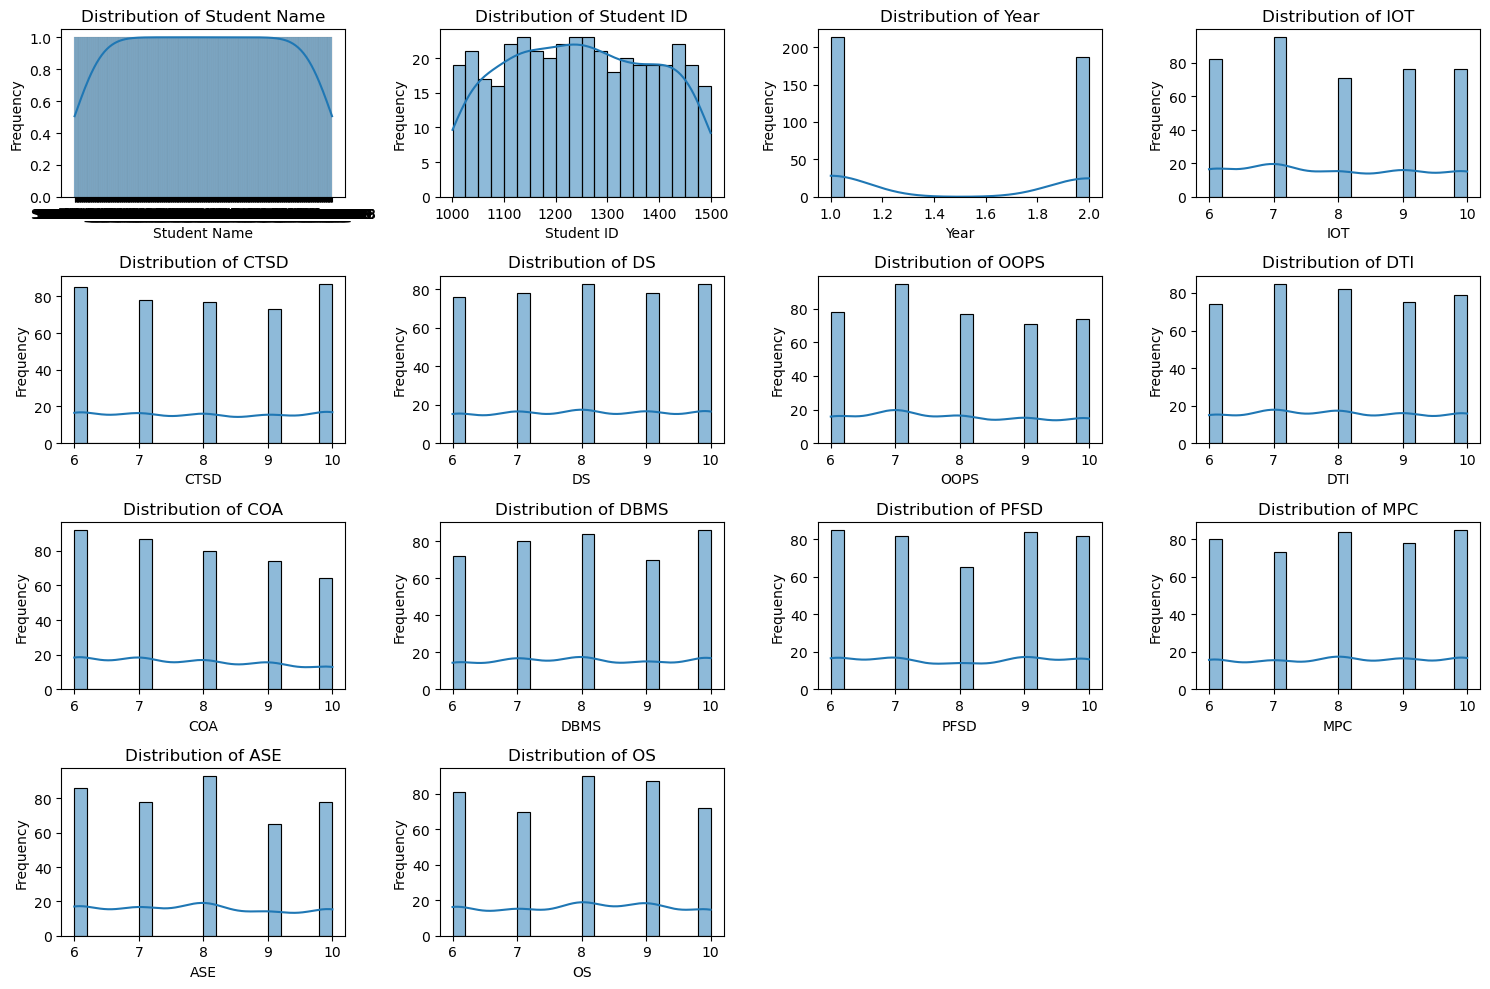

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
n_cols = 4  # Number of columns
n_rows = (len(X_train.columns) + n_cols - 1) // n_cols  # Calculate rows needed

for i, col in enumerate(X_train.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X_train[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Step 5: Choose an Appropriate ML Algorithm

In [19]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Fit models to the training data and store them in a dictionary
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} model trained successfully")


Decision Tree model trained successfully
Random Forest model trained successfully
K-Nearest Neighbors model trained successfully


Step 6: Build and Evaluate Each ML Model

In [20]:
from sklearn.metrics import accuracy_score

# Evaluate each model on the test set and print accuracy
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 0.37
Random Forest Accuracy: 0.25
K-Nearest Neighbors Accuracy: 0.36


Step 7: Evaluate Model with Testing Data


In [21]:
from sklearn.metrics import classification_report

# Generate detailed classification report for each model
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    print(f"Performance metrics for {name}:\n")
    print(classification_report(y_test, y_pred))


Performance metrics for Decision Tree:

                precision    recall  f1-score   support

        AI-IPA       0.32      0.28      0.30        39
         Cloud       0.50      0.38      0.43        39
Cyber Security       0.31      0.50      0.38        22

      accuracy                           0.37       100
     macro avg       0.38      0.39      0.37       100
  weighted avg       0.39      0.37      0.37       100

Performance metrics for Random Forest:

                precision    recall  f1-score   support

        AI-IPA       0.23      0.15      0.18        39
         Cloud       0.30      0.26      0.28        39
Cyber Security       0.22      0.41      0.29        22

      accuracy                           0.25       100
     macro avg       0.25      0.27      0.25       100
  weighted avg       0.26      0.25      0.24       100

Performance metrics for K-Nearest Neighbors:

                precision    recall  f1-score   support

        AI-IPA       0.46  

Step 8: Compute Performance Metrics

In [22]:
# Choose the best-performing model, for instance, Random Forest
best_model = trained_models["Random Forest"]
print("Selected Random Forest as the best model.")


Selected Random Forest as the best model.


Step 9: Perform Hyperparameter Tuning


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


Step 10: Iterate Through Steps 3-9 (if Necessary)